In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
import astropy
from tqdm.auto import tqdm

In [3]:
from astropy.io import fits

In [25]:
a_339 = fits.open('/mnt/HD-LSDF/sd18a004/for_yaroslav/neutron_data/raw_data/corrected_projections_681/angle0/IMAT00013470_tomolg_000_00000_cor.fits')

In [5]:
from glob import glob

In [6]:
images_addr = '/mnt/HD-LSDF/sd18a004/for_yaroslav/neutron_data/raw_data/corrected_projections_{num_channels}/angle0/IMAT00013470_tomolg_000_*_cor.fits'

In [7]:
addrs = sorted(glob(images_addr.format(num_channels=339)))
all_arrays = []
for addr in tqdm(addrs):
    all_arrays.append(fits.open(addr)[0].data)
all_arrays_339 = np.stack(all_arrays)

addrs = sorted(glob(images_addr.format(num_channels=681)))
all_arrays = []
for addr in tqdm(addrs):
    all_arrays.append(fits.open(addr)[0].data)
all_arrays_681 = np.stack(all_arrays)

addrs = sorted(glob(images_addr.format(num_channels=1366)))
all_arrays = []
for addr in tqdm(addrs):
    all_arrays.append(fits.open(addr)[0].data)
all_arrays_1366 = np.stack(all_arrays)

addrs = sorted(glob(images_addr.format(num_channels=2840)))
all_arrays = []
for addr in tqdm(addrs):
    all_arrays.append(fits.open(addr)[0].data)
all_arrays_2840 = np.stack(all_arrays)

  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/681 [00:00<?, ?it/s]

  0%|          | 0/1366 [00:00<?, ?it/s]

  0%|          | 0/2840 [00:00<?, ?it/s]

In [41]:
all_arrays = np.stack(all_arrays)

In [8]:
def get_x(binning):
    n_intervals = 4

    tof_lim_left = np.array([15e-3, 27e-3, 44e-3, 53e-3])
    tof_lim_right = np.array([26.68e-3, 43.68e-3, 52.68e-3, 72e-3])
    tof_bin_width = np.array([10.24, 20.48, 20.48, 40.96])

    binning = np.array(binning)

    # calculate number of bins in each shutter interval
    # TOF is in seconds, bins in microseconds
    n_bins = np.int_(np.floor((tof_lim_right - tof_lim_left) / (tof_bin_width * binning * 1e-6)))
    n_bins_total = np.sum(n_bins)

    ## prepare spectral axis for plots
    tof_bins_left = np.zeros((n_bins_total), dtype = np.float32)
    tof_bins_right = np.zeros((n_bins_total), dtype = np.float32)
    counter = 0
    for i in range(n_intervals):
        tof_bins_left[counter:(counter+n_bins[i])] = np.arange(tof_lim_left[i], tof_lim_right[i]-tof_bin_width[i]*binning[i]*1e-6, tof_bin_width[i]*binning[i]*1e-6, dtype = np.float32)
        tof_bins_right[counter:(counter+n_bins[i])] = tof_bins_left[counter:(counter+n_bins[i])] + (tof_bin_width[i]*binning[i]*1e-6)
        counter = counter+n_bins[i]

    tof_bins_center = ((tof_bins_left + tof_bins_right) / 2)

    l = 56.428
    # full equation
    # angstrom_lim_1 = (tof_lim_1 * const.h) / (const.m_n * l) * 1e10
    # angstrom_lim_2 = (tof_lim_2 * const.h) / (const.m_n * l) * 1e10
    # and it's simplified form
    angstrom_lim_1 = (tof_lim_left * 3957) / l
    angstrom_lim_2 = (tof_lim_right * 3957) / l
    angstrom_bins_center = (tof_bins_center * 3957) / l
    angstrom_bin_width = (tof_bin_width * 1e-6 * 3957) / l
    return angstrom_bins_center

In [54]:
[1, 1, 1, 1],[4, 2, 2, 1], [8, 4, 4, 2], [16, 8, 8, 4]

array([1.0522304, 1.0529485, 1.0536665, ..., 5.0392976, 5.042169 ,
       5.0450416], dtype=float32)

In [10]:
import seaborn as sns

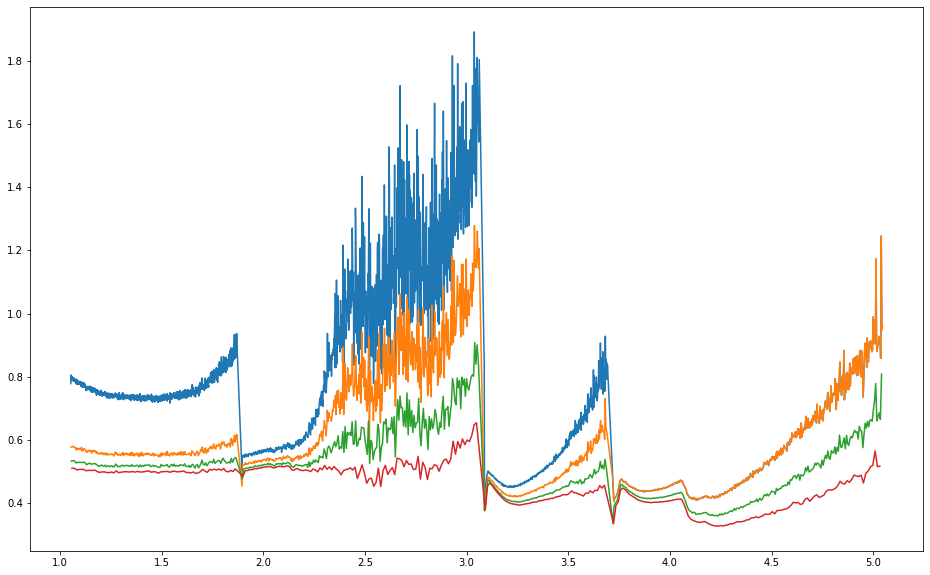

In [11]:
plt.figure(figsize=(16, 10))
plt.plot(get_x([1, 1, 1, 1]),  all_arrays_2840.std((1, 2)) / all_arrays_2840.mean((1, 2)))
plt.plot(get_x([4, 2, 2, 1]),  all_arrays_1366.std((1, 2)) / all_arrays_1366.mean((1, 2)))
plt.plot(get_x([8, 4, 4, 2]),  all_arrays_681.std((1, 2))  / all_arrays_681.mean((1, 2)))
plt.plot(get_x([16, 8, 8, 4]), all_arrays_339.std((1, 2))  / all_arrays_339.mean((1, 2)))
plt.show()

In [99]:
import scipy.stats

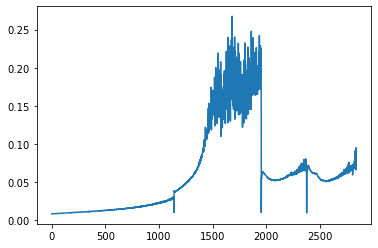

In [105]:
plt.plot()

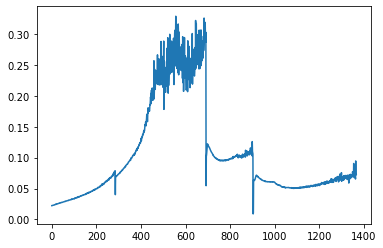

In [106]:
plt.plot((scipy.stats.sem(all_arrays_1366.reshape((-1, 512**2)), axis=1) * scipy.stats.t.ppf((1 + 0.95) / 2., len(all_arrays_1366)-1)))

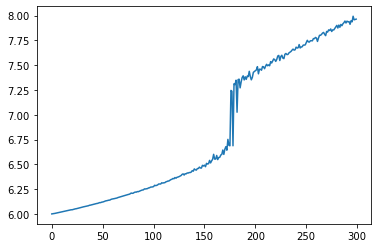

In [94]:
plt.plot(np.percentile(all_arrays_2840[:300], 95, (1, 2)))

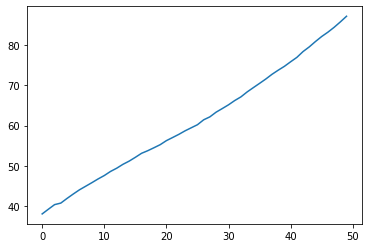

In [145]:
plt.plot(np.percentile(all_arrays_339[:50], 50, (1, 2)))

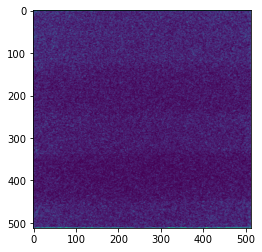

In [130]:
plt.imshow(all_arrays_2840[103], vmin=0, vmax=35)

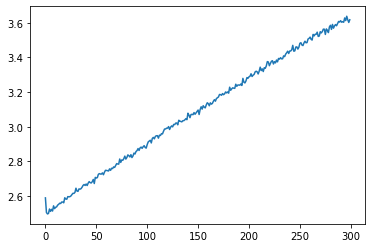

In [87]:
plt.plot(np.mean(all_arrays_2840[:300], (1, 2)))

In [84]:
np.median(all_arrays_2840[:300:10], axis=(1, 2))

array([2.       , 2.0069306, 2.0146601, 2.022954 , 2.0313165, 2.0405185,
       2.0503225, 2.0607448, 2.0720675, 2.0859275, 2.1046073, 3.0600076,
       3.0708244, 3.0793772, 3.095838 , 3.1037388, 3.1160645, 3.1284888,
       3.1381757, 3.152002 , 3.1659508, 3.177946 , 3.1904511, 3.2055879,
       3.221722 , 3.2384503, 3.2536116, 3.2702339, 3.2839205, 3.2999592],
      dtype=float32)

In [12]:
all_arrays_2840_filtered = np.ones_like(all_arrays_2840)
for i in tqdm(range(len(all_arrays_2840))):
    all_arrays_2840_filtered[i] = np.clip(all_arrays_2840[i], np.percentile(all_arrays_2840[i], 1), np.percentile(all_arrays_2840[i], 99))

  0%|          | 0/2840 [00:00<?, ?it/s]

In [13]:
all_arrays_1366_filtered = np.ones_like(all_arrays_1366)
for i in tqdm(range(len(all_arrays_1366))):
    all_arrays_1366_filtered[i] = np.clip(all_arrays_1366[i], np.percentile(all_arrays_1366[i], 1), np.percentile(all_arrays_1366[i], 99))

  0%|          | 0/1366 [00:00<?, ?it/s]

In [14]:
all_arrays_681_filtered = np.ones_like(all_arrays_681)
for i in tqdm(range(len(all_arrays_681))):
    all_arrays_681_filtered[i] = np.clip(all_arrays_681[i], np.percentile(all_arrays_681[i], 1), np.percentile(all_arrays_681[i], 99))

  0%|          | 0/681 [00:00<?, ?it/s]

In [15]:
all_arrays_339_filtered = np.ones_like(all_arrays_339)
for i in tqdm(range(len(all_arrays_339))):
    all_arrays_339_filtered[i] = np.clip(all_arrays_339[i], np.percentile(all_arrays_339[i], 1), np.percentile(all_arrays_339[i], 99))

  0%|          | 0/339 [00:00<?, ?it/s]

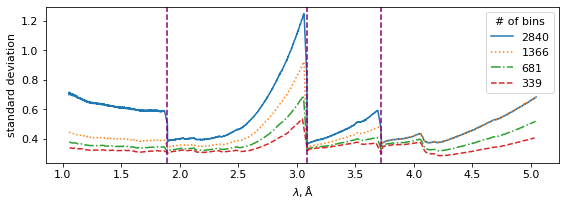

In [21]:
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(8, 3))
plt.plot(get_x([1, 1, 1, 1]),  
         (all_arrays_2840_filtered.std((1, 2)) 
          / all_arrays_2840_filtered.mean(axis=(1, 2))), 
         linestyle='-', label='2840')
plt.plot(get_x([4, 2, 2, 1]),  
         (all_arrays_1366_filtered.std((1, 2)) 
          / all_arrays_1366_filtered.mean(axis=(1, 2))), 
         linestyle=':', label='1366')
plt.plot(get_x([8, 4, 4, 2]),  
         (all_arrays_681_filtered.std((1, 2))  
          / all_arrays_681_filtered.mean(axis=(1, 2))), 
         linestyle='-.', label='681')
plt.plot(get_x([16, 8, 8, 4]), 
         (all_arrays_339_filtered.std((1, 2))  
          / all_arrays_339_filtered.mean(axis=(1, 2))), 
         linestyle='--', label='339')

for i in np.array([27e-3, 44e-3, 53e-3]) * 3957 / 56.428:
    plt.axvline(i, color='purple', linestyle='--')

plt.xlabel(r'$\lambda, \mathrm{\AA}$')
plt.ylabel('standard deviation')
plt.legend(title='# of bins')
plt.tight_layout()
plt.savefig('figures/std-means.pdf')


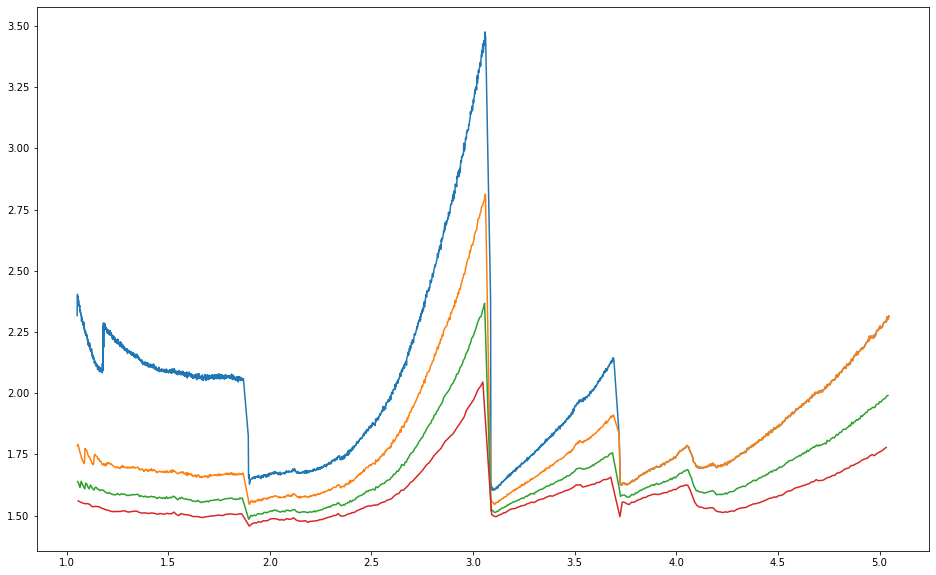

In [88]:
plt.figure(figsize=(16, 10))
plt.plot(get_x([1, 1, 1, 1]),  np.percentile(all_arrays_2840, 95, (1, 2)) / np.mean(all_arrays_2840, axis=(1, 2)))
plt.plot(get_x([4, 2, 2, 1]),  np.percentile(all_arrays_1366, 95, (1, 2)) / np.mean(all_arrays_1366, axis=(1, 2)))
plt.plot(get_x([8, 4, 4, 2]),  np.percentile(all_arrays_681, 95, (1, 2)) / np.mean(all_arrays_681, axis=(1, 2)))
plt.plot(get_x([16, 8, 8, 4]),  np.percentile(all_arrays_339, 95, (1, 2)) / np.mean(all_arrays_339, axis=(1, 2)))
plt.show()

In [109]:
get_ci = lambda aa: (scipy.stats.sem(aa.reshape((-1, 512**2)), axis=1) * scipy.stats.t.ppf((1 + 0.95) / 2., len(aa)-1)) / aa.mean((1, 2))

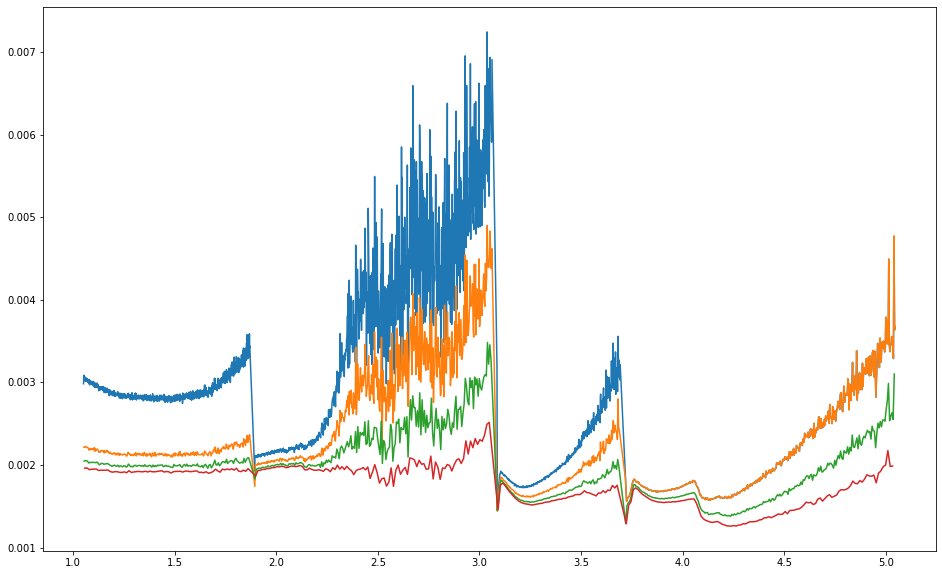

In [110]:
plt.figure(figsize=(16, 10))
plt.plot(get_x([1, 1, 1, 1]),  get_ci(all_arrays_2840))
plt.plot(get_x([4, 2, 2, 1]),  get_ci(all_arrays_1366))
plt.plot(get_x([8, 4, 4, 2]),  get_ci(all_arrays_681))
plt.plot(get_x([16, 8, 8, 4]), get_ci(all_arrays_339))
plt.show()

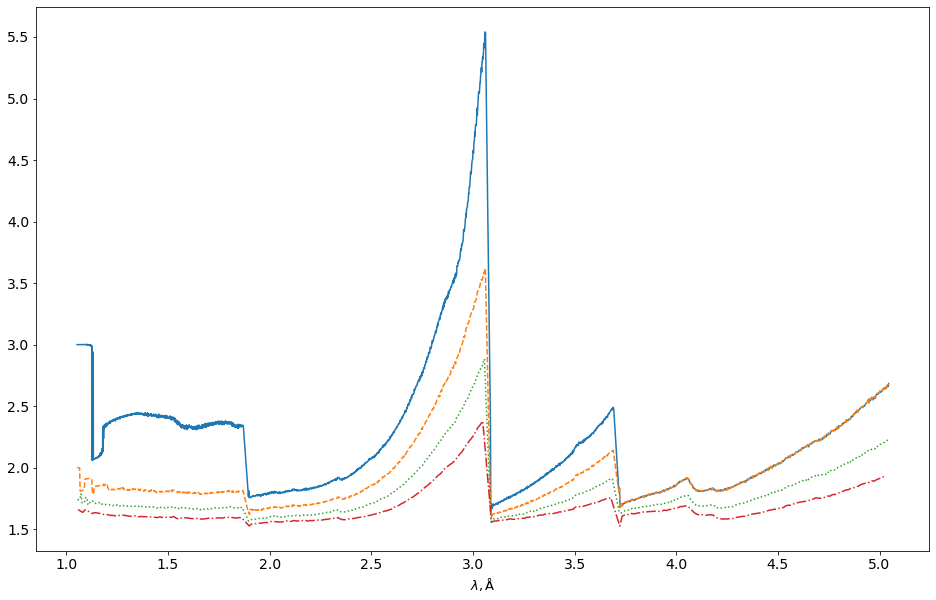

In [146]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(16, 10))
plt.plot(get_x([1, 1, 1, 1]),  
         np.percentile(all_arrays_2840, 95, (1, 2)) / np.median(all_arrays_2840, axis=(1, 2)), linestyle='-')
plt.plot(get_x([4, 2, 2, 1]),  
         np.percentile(all_arrays_1366, 95, (1, 2)) / np.median(all_arrays_1366, axis=(1, 2)), linestyle='--')
plt.plot(get_x([8, 4, 4, 2]),  
         np.percentile(all_arrays_681, 95, (1, 2))  / np.median(all_arrays_681, axis=(1, 2)),  linestyle=':')
plt.plot(get_x([16, 8, 8, 4]),  
         np.percentile(all_arrays_339, 95, (1, 2))  / np.median(all_arrays_339, axis=(1, 2)),  linestyle='-.')
plt.xlabel(r'$\lambda, \mathrm{\AA}$')
plt.show()

In [161]:
all_arrays_2840_n = all_arrays_2840 - all_arrays_2840.mean((1,2), keepdims=True)

In [198]:
import pandas as pd

(29, 512, 512)

In [200]:
vio_x = []
vio_y = []
for i, frame in enumerate(all_arrays_2840[::100]):
    vio_x.append(frame.flatten())
    vio_y.append(np.ones(512**2)*i)
vio_x = np.concatenate(vio_x)
vio_y = np.concatenate(vio_y)

In [203]:
points = np.random.randint(0, len(vio_x), 10_000)

/home/ws/tb0536/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

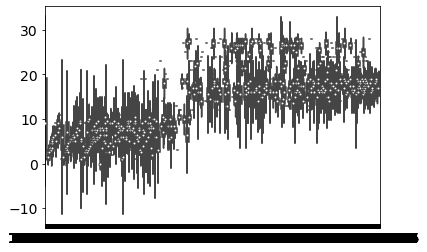

In [204]:
sns.violinplot(vio_x[points], vio_y[points])

(0.0, 200.0)

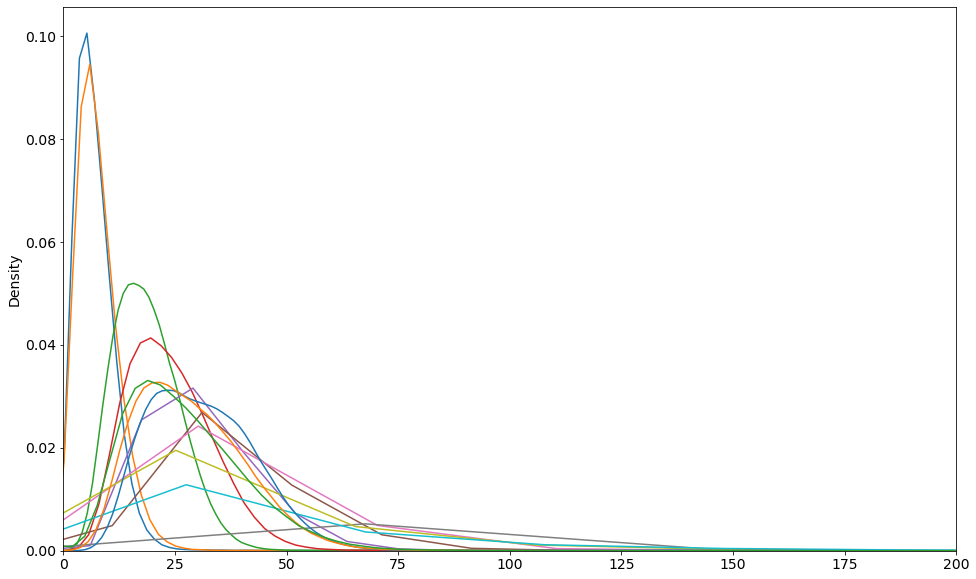

In [197]:
plt.figure(figsize=(16, 10))
sns.kdeplot(all_arrays_2840[1000].flatten())
sns.kdeplot(all_arrays_2840[1100].flatten())
sns.kdeplot(all_arrays_2840[1200].flatten())
sns.kdeplot(all_arrays_2840[1300].flatten())
sns.kdeplot(all_arrays_2840[1400].flatten())
sns.kdeplot(all_arrays_2840[1500].flatten())
sns.kdeplot(all_arrays_2840[1600].flatten())
sns.kdeplot(all_arrays_2840[1700].flatten())
sns.kdeplot(all_arrays_2840[1800].flatten())
sns.kdeplot(all_arrays_2840[1900].flatten())
sns.kdeplot(all_arrays_2840[2000].flatten())
sns.kdeplot(all_arrays_2840[2100].flatten())
sns.kdeplot(all_arrays_2840[2200].flatten())
plt.xlim(0, 200)

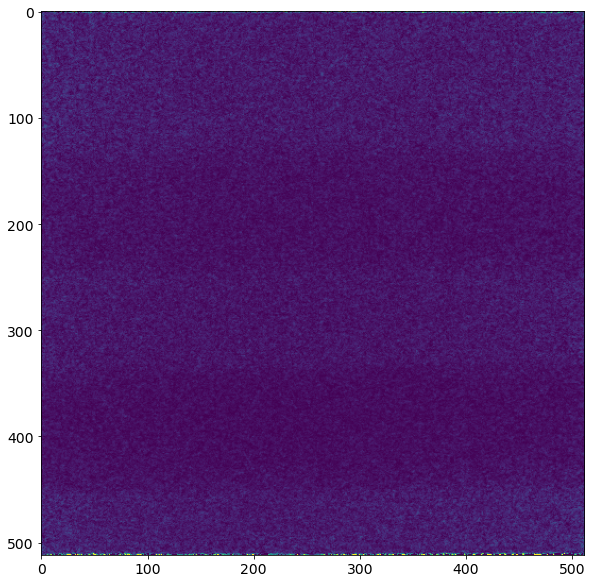

In [186]:
plt.figure(figsize=(10, 10))
plt.imshow(all_arrays_2840[1100], vmax=130)
plt.show()

(array([2.50808207e-03, 4.01950032e-07, 7.65619050e-08, 9.57023959e-09,
        2.87107188e-08, 1.91404733e-08, 9.57024252e-09, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.69916566e-08, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.61321299e-08]),
 array([   0. ,  398.6,  797.2, 1195.8, 1594.4, 1993. , 2391.6, 2790.2,
        3188.8, 3587.4, 3986. , 4384.6, 4783.2, 5181.8, 5580.4, 5979. ,
        6377.6, 6776.2, 7174.8, 7573.4, 7972. ], dtype=float32),
 <BarContainer object of 20 artists>)

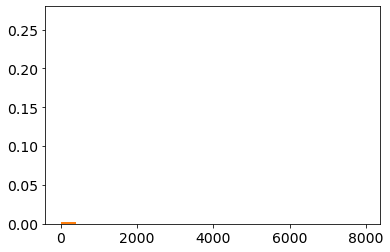

In [176]:
plt.hist(all_arrays_2840[0].flatten(), bins=20, density=True)
plt.hist(all_arrays_2840[1800].flatten(), bins=20, density=True)

(array([2.26265e+05, 3.38920e+04, 1.09200e+03, 4.19000e+02, 2.62000e+02,
        1.40000e+02, 5.10000e+01, 1.80000e+01, 4.00000e+00, 1.00000e+00]),
 array([-3.9552662,  2.5337293,  9.022725 , 15.511721 , 22.000715 ,
        28.489712 , 34.978706 , 41.4677   , 47.9567   , 54.445694 ,
        60.93469  ], dtype=float32),
 <BarContainer object of 10 artists>)

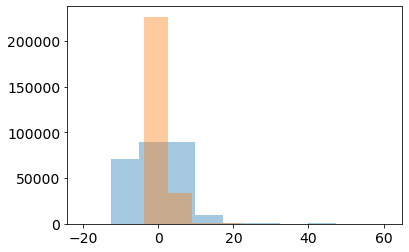

In [167]:
plt.hist(all_arrays_2840_n.mean(0).flatten(), alpha=0.4)
plt.hist(all_arrays_2840_n[400].flatten(), alpha=0.4)

In [170]:
mean_frame_2840_n = all_arrays_2840_n.mean(0)

In [171]:
psnrs_2840 = [peak_signal_noise_ratio(mean_frame_2840_n, frame, data_range=80) for frame in tqdm(all_arrays_2840_n)]

  0%|          | 0/2840 [00:00<?, ?it/s]

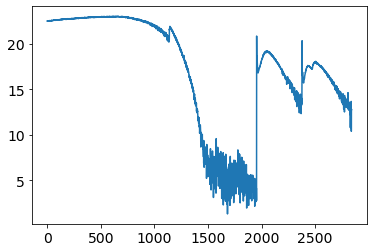

In [172]:
plt.plot(psnrs_2840)

In [11]:
from torchvision.models import alexnet

In [12]:
m = alexnet()

In [16]:
sum(p.numel() for p in m.parameters())

61100840

In [17]:
from torchvision.models import resnet18

In [18]:
m = resnet18()

In [19]:
sum(p.numel() for p in m.parameters())

11689512